In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import resample
import plotly.express as px
import matplotlib
import plotly.offline as pyo  
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import resample
from scipy.stats import spearmanr

In [3]:
eeg_df = pd.read_csv("merged_dataset (1).csv")

In [4]:
eeg_df.head()

,# EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG 28-REF,EEG 29-REF,EEG 30-REF,EEG T1-REF,EEG T2-REF,PHOTIC-REF,IBI,BURSTS,SUPPR,label
0,-0.000015,-0.000005,-0.000026,2.290000e-06,-0.000025,-0.000003,-1.590000e-05,-6.250000e-06,-1.370000e-06,0.000005,...,0.000007,0.000018,1.270000e-05,-0.000042,-0.000011,0.0,0.0,0.0,0.0,1.0
1,-0.000019,-0.000007,-0.000030,-4.540000e-07,-0.000026,-0.000001,-1.360000e-05,-2.130000e-06,-7.590000e-07,0.000010,...,0.000013,0.000022,1.820000e-05,-0.000048,-0.000014,0.0,0.0,0.0,0.0,1.0
2,-0.000025,-0.000009,-0.000035,7.660000e-07,-0.000026,-0.000001,-1.170000e-05,6.140000e-07,-2.740000e-06,0.000011,...,0.000006,0.000020,3.090000e-07,-0.000054,-0.000015,0.0,0.0,0.0,0.0,1.0
3,-0.000027,-0.000011,-0.000036,3.500000e-09,-0.000024,0.000001,-7.930000e-06,5.340000e-06,-1.830000e-06,0.000013,...,0.000004,0.000007,-1.190000e-05,-0.000058,-0.000019,0.0,0.0,0.0,0.0,1.0
4,-0.000024,-0.000009,-0.000032,-5.180000e-06,-0.000017,0.000004,1.560000e-07,1.100000e-05,1.680000e-06,0.000019,...,0.000011,0.000016,-3.050000e-06,-0.000053,-0.000017,0.0,0.0,0.0,0.0,1.0


In [5]:
eeg_df.describe()

,# EEG FP1-REF,EEG FP2-REF,EEG F3-REF,EEG F4-REF,EEG C3-REF,EEG C4-REF,EEG P3-REF,EEG P4-REF,EEG O1-REF,EEG O2-REF,...,EEG 28-REF,EEG 29-REF,EEG 30-REF,EEG T1-REF,EEG T2-REF,PHOTIC-REF,IBI,BURSTS,SUPPR,label
count,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,...,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2.097150e+06,2097150.0
mean,2.976004e-07,3.290080e-07,1.035618e-06,-2.405285e-07,-7.588721e-09,5.429716e-07,4.297206e-07,4.258999e-07,6.349384e-07,-1.649806e-08,...,7.829694e-06,6.690506e-06,5.815352e-06,7.741067e-07,6.029365e-07,3.545414e-06,5.898098e+01,3.991986e-01,4.421168e+01,0.5
std,7.779946e-05,1.139135e-04,6.547893e-05,3.016465e-05,1.360516e-05,6.005304e-05,5.877252e-05,3.174894e-05,7.714835e-05,2.810585e-05,...,2.065205e-04,1.914199e-04,1.710395e-04,9.513238e-05,6.309301e-05,6.014927e-05,1.214216e+02,7.122352e-01,4.234285e+01,0.5
min,-4.536278e-03,-4.103692e-03,-4.365685e-03,-3.587335e-03,-9.800680e-04,-1.988520e-03,-4.156335e-03,-3.224634e-03,-4.197839e-03,-3.699182e-03,...,-4.999993e-03,-4.994499e-03,-4.993584e-03,-4.182122e-03,-1.893153e-03,0.000000e+00,-1.426568e+02,-3.041402e+00,-1.494676e+01,0.0
25%,-1.300000e-05,-1.250000e-05,-7.470000e-06,-7.020000e-06,-5.180000e-06,-5.030000e-06,-6.410000e-06,-5.790000e-06,-9.150000e-06,-9.150000e-06,...,-1.850000e-05,-2.120000e-05,-1.710000e-05,-1.170000e-05,-1.080000e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.090000e-07,1.560000e-07,3.090000e-07,3.500000e-09,1.560000e-07,1.560000e-07,1.560000e-07,1.560000e-07,3.500000e-09,3.500000e-09,...,3.500000e-09,-1.490000e-07,4.610000e-07,4.610000e-07,6.140000e-07,0.000000e+00,2.135848e-01,1.061667e-01,4.499440e+01,0.5
75%,1.330000e-05,1.270000e-05,8.400000e-06,6.870000e-06,5.340000e-06,5.190000e-06,6.560000e-06,6.260000e-06,9.460000e-06,9.310000e-06,...,1.860000e-05,2.120000e-05,1.790000e-05,1.280000e-05,1.210000e-05,0.000000e+00,8.026146e+01,6.977177e-01,9.126029e+01,1.0
max,4.999847e-03,4.999847e-03,4.999847e-03,2.026827e-03,4.904210e-04,4.999847e-03,4.999847e-03,4.631500e-03,4.999847e-03,4.040680e-03,...,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,4.999847e-03,1.024000e-03,1.030854e+03,2.150698e+01,1.124172e+02,1.0


Focusing on EEG Leads only

In [6]:
Irrelevant_columns = ['EEG T2-REF', 'PHOTIC-REF', 'IBI', 'BURSTS', 'SUPPR']

eeg_df = eeg_df.drop(columns=Irrelevant_columns)

In [7]:
# Splitting data in epilepsy and no epilepsy columns
epi = eeg_df[eeg_df['label'] == 1]
noepi = eeg_df[eeg_df['label'] == 0]

In [8]:
# Counting the number of samples in each category
epilepsy_count = len(epi)
no_epilepsy_count = len(noepi)

In [9]:
# Creating a grouped bar graph
categories = ['Epilepsy', 'No Epilepsy']
counts = [epilepsy_count, no_epilepsy_count]

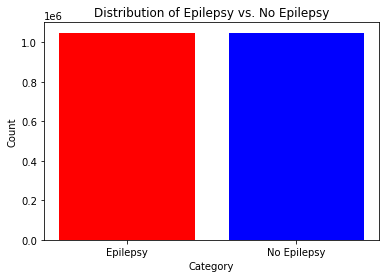

In [10]:
plt.bar(categories, counts, color=['red', 'blue'])
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Epilepsy vs. No Epilepsy')
plt.show()

Downsampling Epilepy and no Epilepsy Data

In [11]:
# Downsampling the majority class (epilepsy) to match the minority class (no epilepsy)
epilepsy_downsampled = resample(epi, replace=False, n_samples=len(noepi), random_state=42)

In [19]:
# Combining the downsampled epilepsy data with the original no epilepsy data
#balanced_data = pd.concat([epilepsy_downsampled, noepi])
import random

# Define the sample size
sample_size = 10000  # Adjust this as needed

# Randomly sample rows from both DataFrames
epilepsy_sample = epilepsy_downsampled.sample(sample_size)
noepi_sample = noepi.sample(sample_size)

# Concatenate the sampled DataFrames
concatenated_data = pd.concat([epilepsy_sample, noepi_sample])

#balanced_data = pd.concat([epilepsy_downsampled, noepi])

In [20]:
# Shuffling the dataset
balanced_data = concatenated_data.sample(frac=1, random_state=42).reset_index(drop=True)

In [21]:
# Count the number of samples in each class
class_counts = balanced_data['label'].value_counts()

# Displaying the class distribution
print(class_counts)

# Checking if the dataset is balanced
is_balanced = class_counts[0] == class_counts[1]

if is_balanced:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

0.0    10000
1.0    10000
Name: label, dtype: int64
The dataset is balanced.


Normalization

In [22]:
# Selecting the columns you want to normalize (excluding the 'label' column)
columns_to_normalize = [col for col in balanced_data.columns if col != 'label']

# Initializing the MinMaxScaler
scaler = MinMaxScaler()

# Fitting the scaler on the data and transforming it
balanced_data[columns_to_normalize] = scaler.fit_transform(balanced_data[columns_to_normalize])

# Displaying the first few rows of the normalized dataset
print(balanced_data.head())

   # EEG FP1-REF  EEG FP2-REF  EEG F3-REF  EEG F4-REF  EEG C3-REF  EEG C4-REF  \
0       0.417083     0.441687    0.119751    0.526304    0.674741    0.546491   
1       0.404870     0.439510    0.093001    0.518210    0.620997    0.574593   
2       0.418650     0.440903    0.116532    0.529821    0.671665    0.551594   
3       0.421627     0.440612    0.121008    0.519536    0.694344    0.558180   
4       0.425299     0.440375    0.127815    0.522960    0.689355    0.530896   

   EEG P3-REF  EEG P4-REF  EEG O1-REF  EEG O2-REF  ...  EEG LOC-REF  \
0    0.121467    0.163128    0.453068    0.200752  ...     0.265648   
1    0.122727    0.186584    0.451112    0.222103  ...     0.253342   
2    0.121225    0.161526    0.451916    0.186358  ...     0.265379   
3    0.125197    0.171270    0.453675    0.207750  ...     0.265894   
4    0.120126    0.159919    0.451447    0.188860  ...     0.275698   

   EEG EKG1-REF   EMG-REF  EEG 26-REF  EEG 27-REF  EEG 28-REF  EEG 29-REF  \
0      0.

In [23]:
# Calculate Spearman Rank correlation coefficients for each lead
correlation_coefficients = {}
for lead in columns_to_normalize:
    correlation, _ = spearmanr(balanced_data[lead], balanced_data['label'])
    correlation_coefficients[lead] = correlation

In [24]:
# Convert the dictionary to a DataFrame for easier plotting
correlation_df = pd.DataFrame(list(correlation_coefficients.items()), columns=['Lead', 'Correlation'])

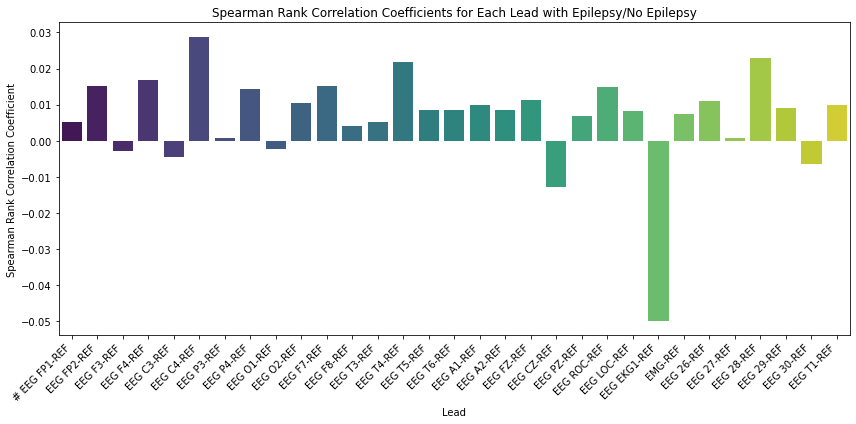

In [25]:
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Lead', y='Correlation', data=correlation_df, palette='viridis')
plt.xlabel('Lead')
plt.ylabel('Spearman Rank Correlation Coefficient')
plt.title('Spearman Rank Correlation Coefficients for Each Lead with Epilepsy/No Epilepsy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [28]:
import pandas as pd
from scipy import stats

# Load your EEG dataset into a Pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)
#data = pd.read_csv('your_dataset.csv')

# Assuming your EEG data is stored in a DataFrame called eeg_df
# Downsample to 256 Hz by selecting every 4th row
downsample_factor = 4
downsampled_eeg_df = eeg_df.iloc[::downsample_factor, :]

# Assuming 'label' is the column containing the labels, and the other columns are features
labels = eeg_df['label']
features = eeg_df.drop(columns=['label'])

# Create an empty DataFrame to store correlation coefficients
correlation_df = pd.DataFrame(columns=['Feature', 'Pearson_Correlation'])

# Calculate Pearson's correlation coefficient for each feature
for feature in features.columns:
    correlation = stats.pearsonr(features[feature], labels)[0]
    correlation_df = correlation_df.append({'Feature': feature, 'Pearson_Correlation': correlation}, ignore_index=True)

# Print or inspect the correlation results
print(correlation_df)



The history saving thread hit an unexpected error (OperationalError('database or disk is full')).History will not be written to the database.


C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

          Feature Pearson_Correlation
0   # EEG FP1-REF           -0.004834
1     EEG FP2-REF           -0.003579
2      EEG F3-REF           -0.015471
3      EEG F4-REF            0.008343
4      EEG C3-REF           -0.000664
5      EEG C4-REF           -0.005892
6      EEG P3-REF           -0.007553
7      EEG P4-REF           -0.009527
8      EEG O1-REF           -0.008428
9      EEG O2-REF           -0.000063
10     EEG F7-REF           -0.006617
11     EEG F8-REF             0.00385
12     EEG T3-REF           -0.008491
13     EEG T4-REF           -0.009377
14     EEG T5-REF           -0.011381
15     EEG T6-REF           -0.001291
16     EEG A1-REF           -0.002538
17     EEG A2-REF           -0.011409
18     EEG FZ-REF           -0.014532
19     EEG CZ-REF           -0.031544
20     EEG PZ-REF           -0.013827
21    EEG ROC-REF           -0.005961
22    EEG LOC-REF           -0.007709
23   EEG EKG1-REF           -0.019238
24        EMG-REF           -0.029567
25     EEG 2

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\1659329269.py:22: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



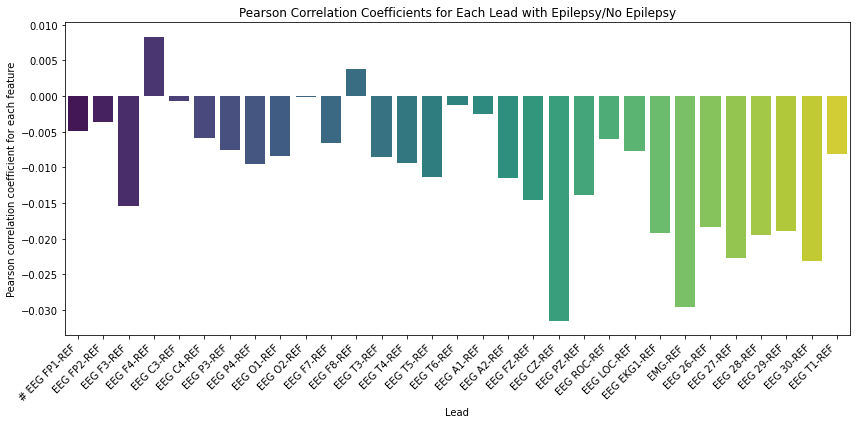

In [29]:
# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Feature', y='Pearson_Correlation', data=correlation_df, palette='viridis')
plt.xlabel('Lead')
plt.ylabel('Pearson correlation coefficient for each feature' )
plt.title('Pearson Correlation Coefficients for Each Lead with Epilepsy/No Epilepsy')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load your EEG dataset into a Pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)
#data = pd.read_csv('your_dataset.csv')

# Assuming 'label' is the column containing the epilepsy labels (0 and 1), and the other columns are EEG leads
# Create an empty DataFrame to store Cramer's V values
cramer_df = pd.DataFrame(columns=['EEG_Lead', 'Cramer_V'])

# Calculate Cramer's V for each EEG lead
for lead in eeg_df.columns[:-1]:  # Exclude the last column (labels)
    contingency_table = pd.crosstab(eeg_df[lead], eeg_df['label'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = sum(contingency_table.sum())
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))
    cramer_df = cramer_df.append({'EEG_Lead': lead, 'Cramer_V': cramers_v}, ignore_index=True)

# Print or inspect the Cramer's V values
print(cramer_df)


C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

         EEG_Lead  Cramer_V
0   # EEG FP1-REF  0.108674
1     EEG FP2-REF  0.169853
2      EEG F3-REF    0.0665
3      EEG F4-REF  0.205497
4      EEG C3-REF  0.081912
5      EEG C4-REF  0.201111
6      EEG P3-REF  0.076345
7      EEG P4-REF  0.179677
8      EEG O1-REF  0.099316
9      EEG O2-REF  0.075544
10     EEG F7-REF  0.099071
11     EEG F8-REF  0.110429
12     EEG T3-REF  0.056019
13     EEG T4-REF  0.120611
14     EEG T5-REF  0.072937
15     EEG T6-REF   0.11824
16     EEG A1-REF  0.096762
17     EEG A2-REF  0.096472
18     EEG FZ-REF  0.155323
19     EEG CZ-REF  0.113417
20     EEG PZ-REF  0.117032
21    EEG ROC-REF  0.132541
22    EEG LOC-REF  0.118817
23   EEG EKG1-REF     0.232
24        EMG-REF  0.222022
25     EEG 26-REF  0.169545
26     EEG 27-REF  0.334884
27     EEG 28-REF  0.176664
28     EEG 29-REF  0.170881
29     EEG 30-REF  0.155738
30     EEG T1-REF  0.083019


C:\Users\m_ghe\AppData\Local\Temp\ipykernel_20708\3912044069.py:19: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\m_ghe\AppData\Local\Temp\ipykernel_11880\1589255379.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_11880\1589255379.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_11880\1589255379.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_11880\1589255379.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\m_ghe\AppData\Local\Temp\ipykernel_11880\1589255379.py:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.co

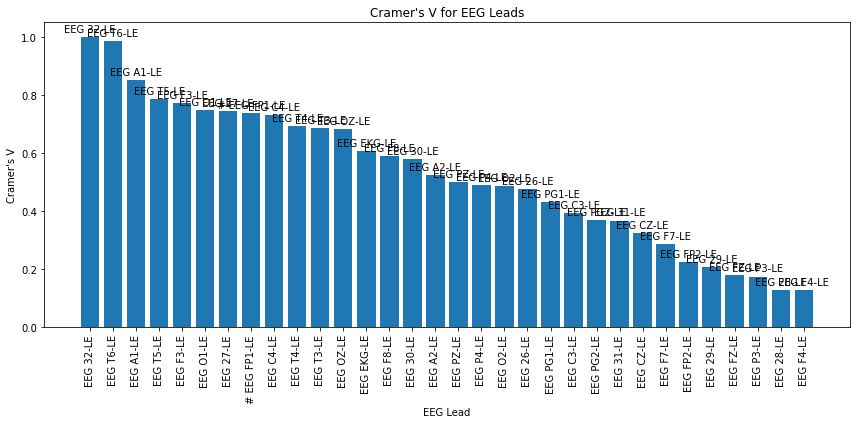

In [31]:
import pandas as pd
from scipy.stats import chi2_contingency
import numpy as np
import matplotlib.pyplot as plt

# Load your EEG dataset into a Pandas DataFrame (replace 'your_dataset.csv' with your actual dataset file)
#data = pd.read_csv('your_dataset.csv')

# Assuming 'label' is the column containing the epilepsy labels (0 and 1), and the other columns are EEG leads
# Create an empty DataFrame to store Cramer's V values
cramer_df = pd.DataFrame(columns=['EEG_Lead', 'Cramer_V'])

# Calculate Cramer's V for each EEG lead
for lead in eeg_df.columns[:-1]:  # Exclude the last column (labels)
    contingency_table = pd.crosstab(eeg_df[lead], eeg_df['label'])
    chi2, _, _, _ = chi2_contingency(contingency_table)
    n = sum(contingency_table.sum())
    phi2 = chi2 / n
    r, k = contingency_table.shape
    cramers_v = np.sqrt(phi2 / min((k - 1), (r - 1)))
    cramer_df = cramer_df.append({'EEG_Lead': lead, 'Cramer_V': cramers_v}, ignore_index=True)

# Sort the DataFrame by Cramer's V values (optional)
cramer_df = cramer_df.sort_values(by='Cramer_V', ascending=False)

# Plot the Cramer's V values
plt.figure(figsize=(12, 6))
bars = plt.bar(cramer_df['EEG_Lead'], cramer_df['Cramer_V'])
plt.xticks(rotation=90)
plt.xlabel('EEG Lead')
plt.ylabel("Cramer's V")
plt.title("Cramer's V for EEG Leads") 

for bar, label in zip(bars, cramer_df['EEG_Lead']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, label, ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()



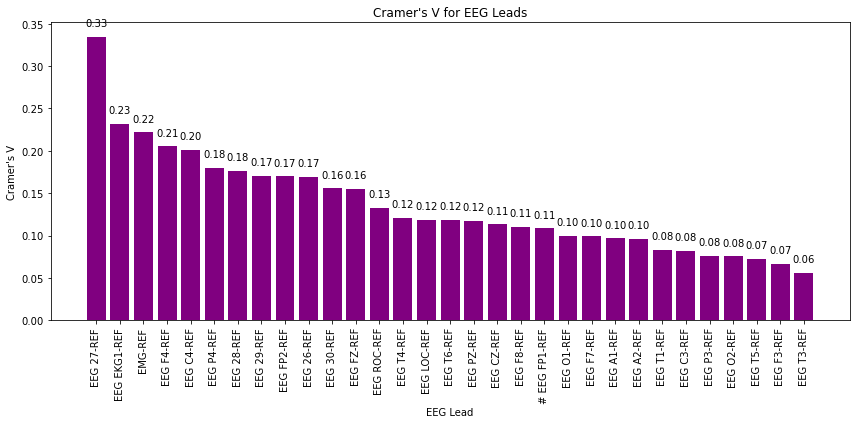

In [31]:
cramer_df = cramer_df.sort_values(by='Cramer_V', ascending=False)

# Plot the Cramer's V values
plt.figure(figsize=(12, 6))
bars = plt.bar(cramer_df['EEG_Lead'], cramer_df['Cramer_V'], color = 'Purple')
plt.xticks(rotation=90)
plt.xlabel('EEG Lead')
plt.ylabel("Cramer's V")
plt.title("Cramer's V for EEG Leads")

# Label the y-values for each bar
for bar, value in zip(bars, cramer_df['Cramer_V']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{value:.2f}', ha='center', va='bottom')

plt.tight_layout()

# Show the plot
plt.show()


